In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# block the pig graph analysis
class btp_graph:
    
    def __init__(self,n):
        self.matrix = np.zeros((n,n))
        self.n = n
        self.graph = None  # https://networkx.org/documentation/latest/reference/functions.html#
        
    def create_edge(self,i,j,w=1.): # i (vertex), j (vertex), w (int weight)
        self.matrix[i,j] = w
        self.matrix[j,i] = w

    def remove_edge(self,i,j):
        self.matrix[i,j] = 0
        self.matrix[j,i] = 0
        
    def get_edge_list(self,vertex): # returns list of connected vertexes
        edge_list = []
        for i,ele in enumerate(self.matrix[vertex]):
            if ele > 0:
                edge_list.append(i)
        return edge_list
    
    def remove_node(self,vertex):
        self.matrix[i] = np.zeros(n)
        self.graph.remove_node(vertex)
        
    def generate_btp_matrix(self):
        self.end_verticies = [0,1,2,3,4,5,9,10,14,15,19,20,24,25,29,30,34,39,40,44,49,50,51,52,53,54]
        for i in range(54):
            if ((i+1) % 5) != 0:
                btp.create_edge(i,i+1)

        for i in range(0,49,10):
            for j in range(5):
                btp.create_edge(i+j,i+j+5)
        for i in range(1,49,10):
            for j in range(4):
                if i+j == 0:
                    continue
                btp.create_edge(i+j,i+j+4)

        for i in range(5,49,10):
            for j in range(4):
                if i+j == 49:
                    continue
                btp.create_edge(i+j,i+j+6)
        for i in range(5,49,10):
            for j in range(5):
                btp.create_edge(i+j,i+j+5)
                
        self.graph = nx.MultiGraph(self.matrix,name="Block the Pig")
        
    def info(self):
        print(nx.info(self.graph))
    
    def display(self,graph):
        nx.draw_spectral(graph,with_labels=True)
        
    def copy(self,graph):
        return graph.copy()
    
    # BFS find edge from pig    
    def BFS(self, vertex, verticies,blocked=[]): # from vertex to any in verticies, but 
        queue = [[vertex]]
        visited = []
        paths = []
        while len(queue) > 0:# v[-1] not in verticies:
            v = queue.pop(0)
            if v[-1] in verticies:
                paths.append(v)
                if len(v) > len(paths[0])+1:
                    return paths[:-1]
            visited.append(v[-1])
            for x in nx.all_neighbors(self.graph,v[-1]):
                if x not in visited and x not in blocked:
                    queue.append(v + [x])
        return paths
    
    

In [3]:
# create graph object
btp = btp_graph(55)
btp.generate_btp_matrix()

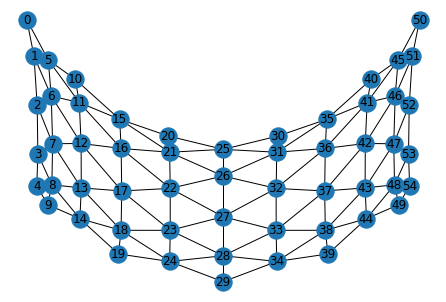

In [6]:
# draw graph
btp.display(btp.graph)
# plt.savefig("game_graph.png") # save as png

In [7]:
btp.BFS(27,btp.end_verticies)

[[27, 23, 24],
 [27, 26, 25],
 [27, 28, 24],
 [27, 28, 29],
 [27, 28, 34],
 [27, 33, 34]]